## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [128]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

## a. Read in the dataset and take a look at the top few rows here:

In [129]:
df= pd.read_csv("ab_data.csv")
df.head()

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [130]:
df.describe()

,Unnamed: 0,user_id,converted
count,294478.000000,294478.000000,294478.000000
mean,147238.500000,787974.124733,0.119659
std,85008.620623,91210.823776,0.324563
min,0.000000,630000.000000,0.000000
25%,73619.250000,709032.250000,0.000000
50%,147238.500000,787933.500000,0.000000
75%,220857.750000,866911.750000,0.000000
max,294477.000000,945999.000000,1.000000


## b. Use the cell below to find the number of rows in the dataset.

In [131]:
#the number of rows in the dataset
df.shape[0]

294478

## c. The number of unique users in the dataset.

In [132]:
#The overall number of users 
df['user_id'].value_counts().sum()

294478

In [133]:
#The number of unique users in the dataset.
unique_users = pd.value_counts(df.user_id.unique()).sum()
unique_users 


290584

In [134]:
#The number of users in the dataset who are opening more than one landing _page 
users_count= pd.value_counts(df['user_id'])
users_count.value_counts()

1    286690
2      3894
Name: user_id, dtype: int64

In [135]:
#There is a difference in unique values and whole user sum ,so that indicates that there are some users opening multiple 
#pages and that must be cleaned. while the user's ratio is small so w can drop them safely
pd.value_counts(df['user_id'])
users=pd.value_counts(df['user_id']).sum()
print ("duplicated user count is :" ,users -unique_users, " users that forms ", ((users -unique_users)/users),"of the population ")

duplicated user count is : 3894  users that forms  0.0132233986919 of the population 


## d. The proportion of users converted.

In [136]:
#The proportion of users converted
converted = df.query('converted == 1')['user_id'].nunique()

total_users = df['user_id'].nunique()
converted_prop = (converted / total_users)*100
converted_prop


12.104245244060237

## e. The number of times the `new_page` and `treatment` don't match.

In [137]:
#show the unique values of group 
(df['group'].unique())

array(['control', 'treatment'], dtype=object)

In [138]:
#show the unique values of landing_page 
(df['landing_page'].unique())

array(['old_page', 'new_page'], dtype=object)

In [139]:
(df['landing_page'].value_counts())

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [140]:
(df['group'].value_counts())

treatment    147276
control      147202
Name: group, dtype: int64

In [141]:
#The number of times the new_page and treatment don't match
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [142]:
df.query( '(group =="control" and landing_page == "new_page") or(group == "treatment"  and  landing_page == "old_page")')['user_id'].count()

3893

## f. Do any of the rows have missing values?

In [143]:
df.isnull().values.any()

False

In [144]:
df.isnull().sum().sum()

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

## a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [145]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)
df2.shape


(290585, 6)

In [146]:
#double check the new dataset for the previous records  
df2.query('(group == "treatment" and landing_page != "new_page")').shape[0]

0

## `3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

## a. How many unique **user_id**s are in **df2**?

In [147]:
df2['user_id'].nunique()

290584

## b. There is one **user_id** repeated in **df2**.  What is it?

In [148]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

## c. What is the row information for the repeat **user_id**? 

In [149]:
df2[df2['user_id'] == 773192]

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
1899,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


## d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [150]:
#sinc we have two records with different timestamp I prefer to keep the latest record
df2 = df2.drop( df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2.shape[0]


290584

In [151]:
#double check the dropped record
df2[df2['user_id'] == 773192]

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
2893,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


## `4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.


In [152]:
converted2 = df2.query('converted == 1')['user_id'].nunique()
total_users2 = df2['user_id'].nunique()
converted_p = converted2 / total_users2
converted_p

0.11959708724499628

## b. Given that an individual was in the `control` group, what is the probability they converted?

In [153]:
conv_control= df2.query('(converted == 1) and ( group  == "control" )')['user_id'].nunique()
control_users = df2.query('group == "control"')['user_id'].nunique()
conv_control_p = conv_control / control_users
conv_control_p

0.1203863045004612

In [154]:
control_users

145274

## c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [155]:
conv_treatment= df2.query('(converted == 1) and ( group  == "treatment" )')['user_id'].nunique()
treatment_users = df2.query('group == "treatment"')['user_id'].nunique()
conv_treatment_p = conv_treatment / treatment_users
conv_treatment_p

0.11880806551510564

In [156]:
treatment_users

145310

## d. What is the probability that an individual received the new page?

In [157]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [158]:
pd.crosstab(df2['group'], df2['landing_page'])

landing_page,new_page,old_page
group,,
control,0,145274
treatment,145310,0


In [159]:
pd.crosstab(df2['landing_page'], df2['converted'])

converted,0,1
landing_page,,
new_page,128046,17264
old_page,127785,17489


In [160]:
new_page = df2.query('landing_page == "new_page"')['user_id'].nunique()
total_pages = df2['landing_page'].nunique()
new_page_p = new_page / total_users2
new_page_p

0.5000619442226688

## e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

b- Given that an individual was in the control group, the probability of converting = 0.1204

c- Given that an individual was in the treatment group, the probability 
        of converting = 0.1188
        
        
Since there are equal chance of receiving landing pages to users ( conculded from D) and there is a tiny difference between B and C
So there is no evidence to conclude that the new treatment page leads to more conversions



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


## `1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

   Null Hypothesis (H0)     : The difference between the average rate of the converted old page and the average of the converted new page <= 0

Alternative Hypothesis (H1) : The difference between the average rate of the converted old page and the average of the converted new page > 0

    - H0:  p_new  -  p_old  <= 0

    - H1:  p_new -   p_old   > 0


## `2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

## a. What is the **conversion rate** for $p_{new}$ under the null? 

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
Unnamed: 0      294478 non-null int64
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(3), object(3)
memory usage: 13.5+ MB


In [127]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

## b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [30]:
p_old = df2.converted.mean()
p_old  

0.11959708724499628

## c. What is $n_{new}$, the number of individuals in the treatment group?

In [31]:
n_new = (df2.query('group == "treatment"')['user_id'].nunique())
n_new

145310

## d. What is $n_{old}$, the number of individuals in the control group?

In [32]:
n_old = (df2.query('group == "control"')['user_id'].nunique())
n_old

145274

In [33]:
df2.head()

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1


## e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.12079691693620535

## f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11927805388438399

## g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
(new_page_converted.mean()) - (old_page_converted.mean())

0.0015188630518213619

## h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [162]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs = np.array(p_diffs)
old_converted_simulation.mean(), new_converted_simulation.mean()


(0.1195939438578135, 0.11960962012249675)

In [167]:
# Alternative: Use loop to create a sampling distribution for our observed statistic with binomials or bootstrapping
#p_diffs = []
#for _ in range(10000):
#     new_page_converted = np.random.binomial(1, p_new, n_new)
#      old_page_converted = np.random.binomial(1, p_old, n_old)
#      p_diffs.append(new_page_converted.mean() - old_page_converted.mean
#())

#convert to numpy array to plot
#p_diffs = np.array(p_diffs)
#p_diffs = []
#for _ in range(10000):
#    boot_sample = df2.sample(df2.shape[0], replace = True)
#   new_page_converted = boot_sample.query('landing_page == "new_page"')['converted'].mean()
#    old_page_converted = boot_sample.query('landing_page == "old_page"')['converted'].mean()
#    p_diffs.append(new_page_converted - old_page_converted)
#p_diffs = []

## i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [165]:
control_convert_actual = df2.query('group == "control"')['converted'].mean()
treatment_convert_actual = df2.query('group == "treatment"')['converted'].mean()
obs_diff = treatment_convert_actual - control_convert_actual

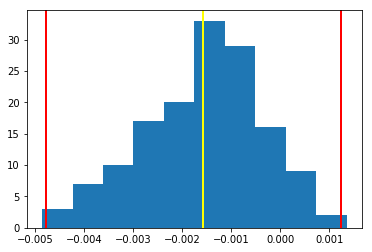

In [166]:
p_diffs = np.array(p_diffs)
# view 99% confidence interval
low, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)
low, upper
plt.hist(p_diffs);
plt.axvline(x=low, color='red', linewidth=2);
plt.axvline(x=upper, color='red', linewidth=2);
plt.axvline(obs_diff, color='yellow', linewidth=2);


## j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [169]:
#null value not needed here to calculate p-value
null_mean = 0
null_vals = np.random.normal(null_mean, np.std(p_diffs), len(p_diffs))
# find proportion of values greater than observed diff since since alternative is > null.
print("Actual observed difference (sample statistic): {}".format(obs_diff))
print("Proportion of p_diffs greater than observed (p-value): {}".format((p_diffs > obs_diff).mean()))


Actual observed difference (sample statistic): -0.0015782389853555567
Proportion of p_diffs greater than observed (p-value): 0.5616438356164384


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [170]:
import statsmodels.api as sm

convert_old = 
convert_new = 
n_old = 
n_new = 

SyntaxError: invalid syntax (<ipython-input-170-349dcc834059>, line 3)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])